Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [2]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/train",
                                          target_size=(32,32),
                                          batch_size = 96,
                                          class_mode = 'binary',subset='training')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/train",
                                          target_size=(32,32),
                                          batch_size = 96,
                                          class_mode = 'binary',subset='validation')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')
print(train_dataset.__len__())
test_dataset.class_indices

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
14


{'SNGAN_bicubic_test': 0, 'imagewoof_test': 1}

Design Model

In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
# model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(32,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-03 21:27:04.797640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-03 21:27:04.797740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# steps per epoch is calculated as train_length // batch_size
history = model.fit(train_dataset,
        #  steps_per_epoch = 42,
         epochs = 100,
         callbacks=[early_stopping],
         validation_data = validation_dataset,
        
         )

Epoch 1/100


2022-07-03 21:27:04.924839: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 5/14 [=========>....................] - ETA: 0s - loss: 1.4476 - accuracy: 0.5563

2022-07-03 21:27:05.203098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 28ms/step - loss: 1.0549 - accuracy: 0.5500 - val_loss: 0.6154 - val_accuracy: 0.5875
Epoch 2/100
 5/14 [=========>....................] - ETA: 0s - loss: 0.6233 - accuracy: 0.6083

2022-07-03 21:27:05.621714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 18ms/step - loss: 0.5857 - accuracy: 0.6930 - val_loss: 0.5354 - val_accuracy: 0.7250
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 0.4762 - accuracy: 0.8047 - val_loss: 0.4696 - val_accuracy: 0.8156
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.4195 - accuracy: 0.8148 - val_loss: 0.3845 - val_accuracy: 0.8438
Epoch 5/100
14/14 [==============================] - 0s 18ms/step - loss: 0.3453 - accuracy: 0.8664 - val_loss: 0.3684 - val_accuracy: 0.8406
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2993 - accuracy: 0.8891 - val_loss: 0.3085 - val_accuracy: 0.8750
Epoch 7/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2664 - accuracy: 0.9055 - val_loss: 0.2801 - val_accuracy: 0.8875
Epoch 8/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2154 - accuracy: 0.9344 - val_loss: 0.2652 - val_accuracy: 0.8969
Epoch 9/100
14/14 

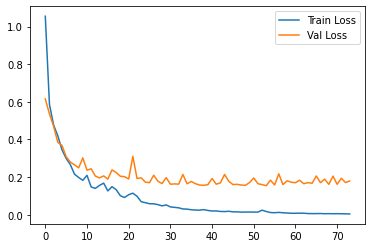

In [6]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(74)

plt.figure()
plt.plot(xc, train_loss,label = 'Train Loss')
plt.plot(xc, val_loss,label = 'Val Loss')
plt.legend(loc='upper right')



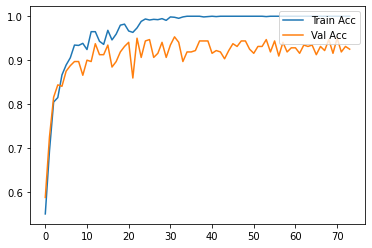

In [7]:
plt.figure()
plt.plot(xc, train_acc,label = 'Train Acc')
plt.plot(xc, val_acc,label = 'Val Acc')
plt.legend(loc='upper right')

In [8]:
_, acc = model.evaluate(test_dataset)
print('Trained with Bicubic')
print('Bicubic: ' ,acc *100)

test_dataset2 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset2)
print('Bilinear: ' ,acc *100)

test_dataset3 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset3)
print('Pixelsuffle: ' ,acc *100)

5/5 [==============================] - 0s 12ms/step - loss: 0.2685 - accuracy: 0.8950
Trained with Bicubic
Bicubic:  89.49999809265137
Found 400 images belonging to 2 classes.
5/5 [==============================] - 0s 8ms/step - loss: 1.9847 - accuracy: 0.5650
Bilinear:  56.49999976158142
Found 400 images belonging to 2 classes.
5/5 [==============================] - 0s 9ms/step - loss: 1.7291 - accuracy: 0.5450
Pixelsuffle:  54.500001668930054


Prediction

[[1.]]


2022-05-19 14:34:52.834697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


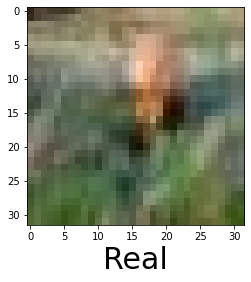

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val >= 0.5:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val < 0.5:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test/imagewoof_test/952.jpg")


[[1.]]


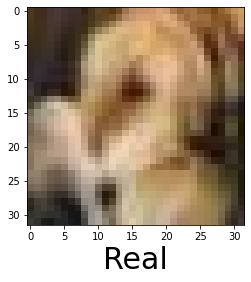

In [ ]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test/SNGAN_bicubic_test/960.jpg")